# PCA for Images Project

Another way to show the inner workings of PCA is to use an image dataset. An image can be represented as a row in a data matrix, where each feature corresponds to the intensity of a pixel.

In this and the following exercise, we will be using the Olivetti Faces image dataset. We will begin by standardizing the images, and then observing the images of faces themselves.



In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']

In [3]:
# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std

In [4]:
# 2. Find the side length of a square image
n_images, n_features = faces_standardized.shape
side_length = int(np.sqrt(n_features))
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')

Number of features(pixels) per image: 4096
Square image side length: 64


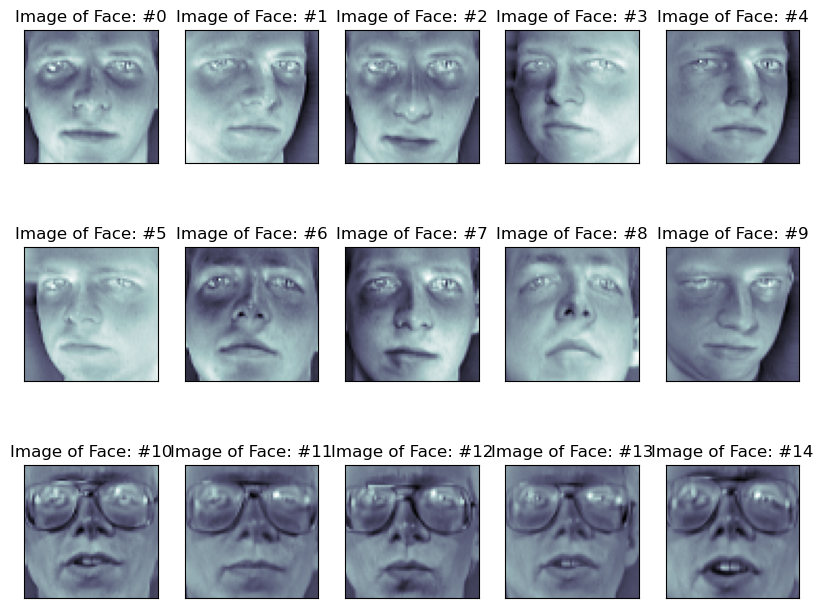

In [5]:
# 3.

# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))
 
# Observe the first 15 images.
for i in range(15):
 
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')
 
    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]
 
    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)
 
    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()

Now that we have cleaned up the data, we can perform PCA to retrieve the eigenvalues and eigenvectors.

This can be useful in understanding how PCA works! We can visualize the eigenvectors by plotting them. They actually have a name: eigenfaces. The eigenfaces are the building blocks for all the other faces in the data.

We can also visualize the dimensionality reduction that occurs when we transform the original data using a smaller number of principal components.

    Plot the eigenfaces
    Plot the reconstructed faces using a smaller number of transformed features.                                       To start, we’ve used 400 principal components — only 0.9% of the original number of features (pixels)!



In [6]:
# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=400) 
pca.fit(faces_standardized)

PCA(n_components=400)

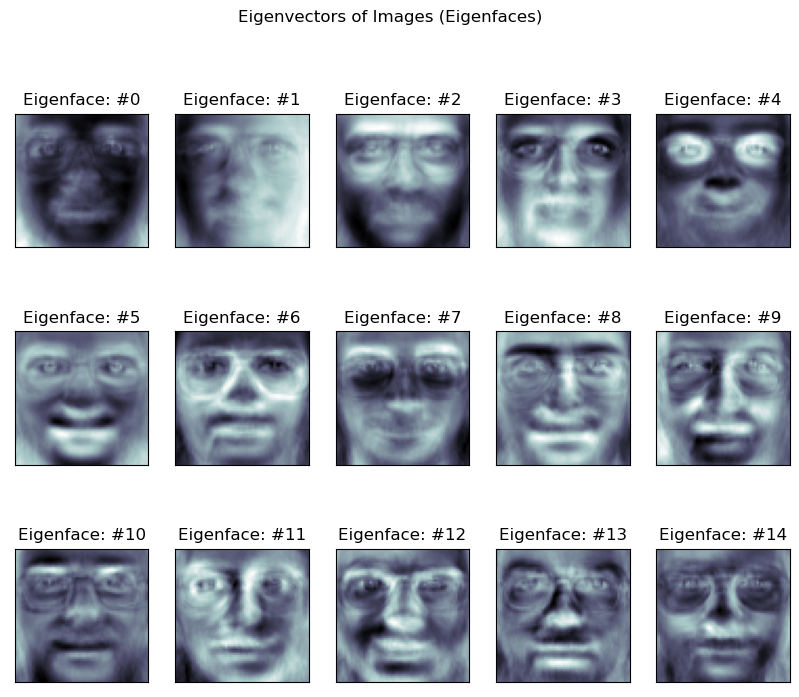

In [7]:
# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()


In [8]:
# 3. Reconstruct images from the compressed principal components

# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)


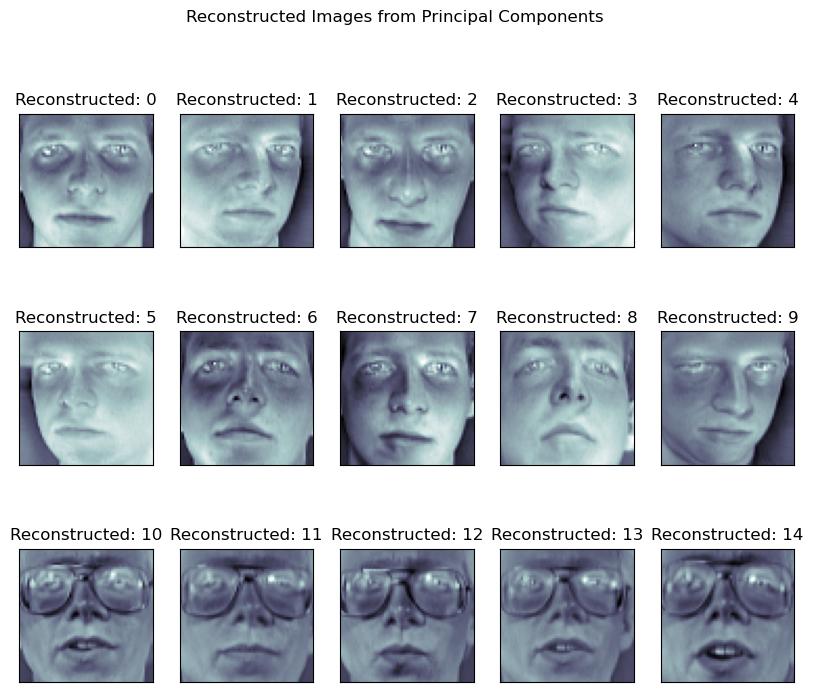

In [9]:
# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()


In [10]:
# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=40) 
pca.fit(faces_standardized)

PCA(n_components=40)

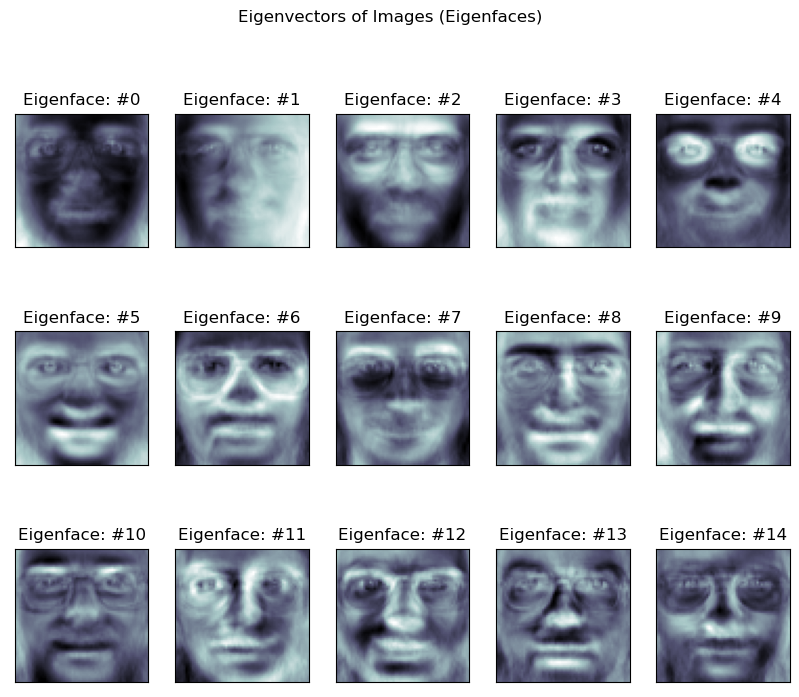

In [11]:
# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()


In [12]:
# 3. Reconstruct images from the compressed principal components

# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)


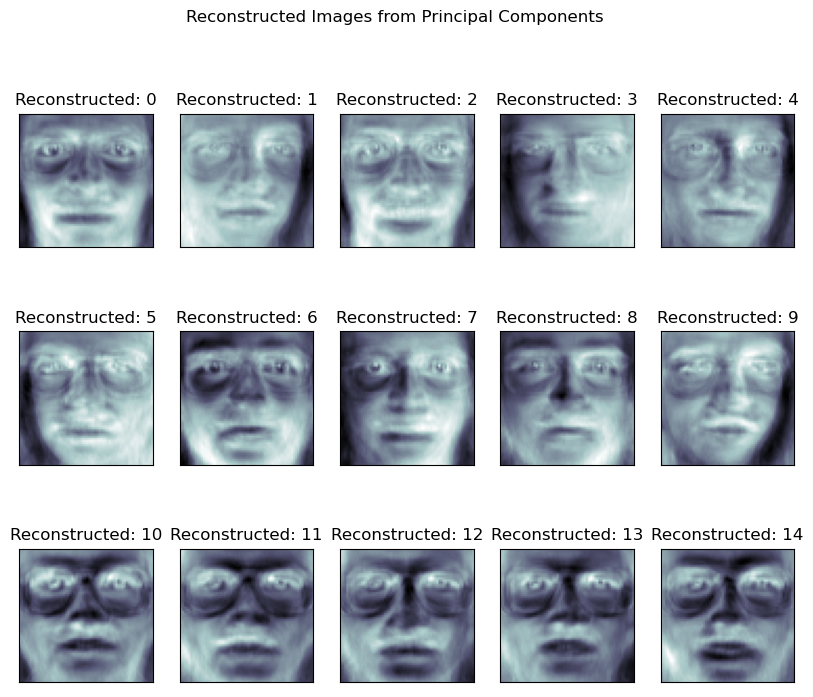

In [13]:
# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()


## Implementing PCA in Python

In this lesson, we have seen how PCA can be implemented using NumPy and scikit-learn. In particular, we have seen how:

    Implementation: scikit-learn provides a more in-depth set of methods and attributes                                 that extend the number of ways to perform PCA or display the percentage of variance                                 for each principal axis.
    
    Dimensionality reduction: We visualized the data projected onto the principal axes,                                 known as principal components.
    
    Image classification: We performed PCA on images of faces to visually understand how                               principal components still retain nearly all the information in the original dataset.
    
    Improved algorithmic speed/accuracy: Using principal components as input to a classifier,                           we observed how we could achieve equal or better results with lower dimensional data.                               Having lower dimensionality also speeds the training.

